# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:

customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# I am going to start proceeding to clean as I walk through analysing the dataset so the data cleaning 
# so in challenge two I will only do the transformation if needed

In [4]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# Your code here:

customers.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
customers.dtypes
# no categorical data to convert however if you read Attribute info you can see that Channel and Region are nominal

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
customers['Channel'].unique()

#only two channels instead of three 

array([2, 1])

In [8]:
customers['Region'].unique()

# three regions

array([3, 1, 2])

In [9]:
# Your observations here

In [10]:
customers.isna().sum()

#there is no null data 

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [12]:
# all numerical variables, fresh, milk, grocery, frozen, detergents_paper and delicassen have high standard deviation and a big difference
# between min and max

In [13]:
customers.skew()
#calculate level of skewness for each column being 0 best distribution

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

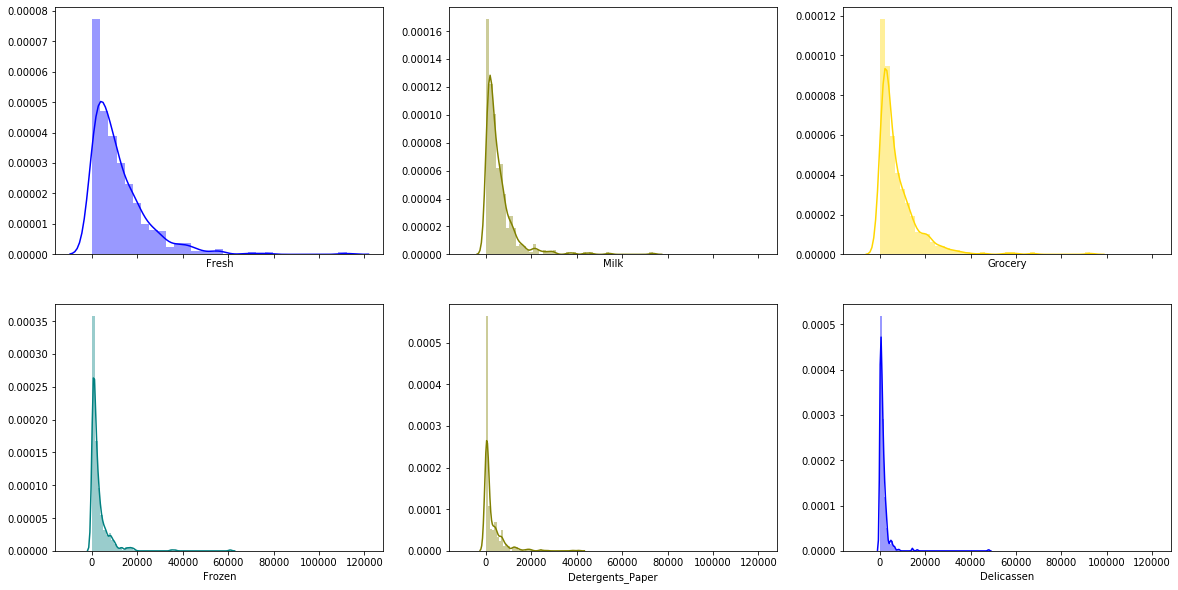

In [14]:
# picturing skewness
f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)
sns.distplot( customers["Fresh"] , color="blue", ax=axes[0,0])
sns.distplot( customers["Milk"] , color="olive", ax=axes[0, 1])
sns.distplot( customers["Grocery"] , color="gold", ax=axes[0, 2])
sns.distplot( customers["Frozen"] , color="teal", ax=axes[1, 0])
sns.distplot( customers["Detergents_Paper"] , color="olive", ax=axes[1, 1])
sns.distplot( customers["Delicassen"] , color="blue", ax=axes[1, 2])

# all variable are skewed

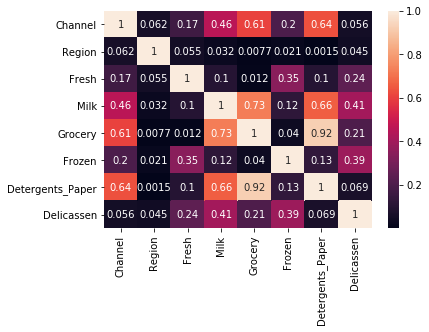

In [53]:
corr_matrix = customers.corr().abs()
corr_matrix
sns.heatmap(corr_matrix,annot=True)

# From correlation matrix I can see relationships with the following variables
#Grocery and Detergents_Paper.
#Grocery and Milk.
#Detergents_Paper and Milk (not too strong)


In [16]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [17]:
print(upper)

                  Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel               NaN  0.062028  0.169172  0.460720  0.608792  0.202046   
Region                NaN       NaN  0.055287  0.032288  0.007696  0.021044   
Fresh                 NaN       NaN       NaN  0.100510  0.011854  0.345881   
Milk                  NaN       NaN       NaN       NaN  0.728335  0.123994   
Grocery               NaN       NaN       NaN       NaN       NaN  0.040193   
Frozen                NaN       NaN       NaN       NaN       NaN       NaN   
Detergents_Paper      NaN       NaN       NaN       NaN       NaN       NaN   
Delicassen            NaN       NaN       NaN       NaN       NaN       NaN   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                    0.001483    0.045212  
Fresh                     0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641    0.205

In [18]:
# With the correlation matrix I am still not sure what column/s to drop, grocery delicassen or milk
# need further exploration with feature scaling and once more comparing relationships between variables!

In [19]:
#to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

#removing columns with high correlation, more than 0.8 

In [20]:
#applying z-score to identify outliers

z = np.abs(stats.zscore(customers))
print(z)

[[1.44865163 0.59066829 0.05293319 ... 0.58936716 0.04356873 0.06633906]
 [1.44865163 0.59066829 0.39130197 ... 0.27013618 0.08640684 0.08915105]
 [1.44865163 0.59066829 0.44702926 ... 0.13753572 0.13323164 2.24329255]
 ...
 [1.44865163 0.59066829 0.20032554 ... 0.54337975 2.51121768 0.12145607]
 [0.69029709 0.59066829 0.13538389 ... 0.41944059 0.56977032 0.21304614]
 [0.69029709 0.59066829 0.72930698 ... 0.62009417 0.50488752 0.52286938]]


In [21]:
threshold = 3
print(np.where(z > 3))
#all the data points which are outliers and where they are located, row first and column second

(array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413]), array([3, 7, 2, 3, 4, 6, 3, 6, 3, 4, 6, 4, 6, 7, 3, 4, 6, 3, 6, 7, 6, 5,
       2, 5, 2, 2, 3, 3, 5, 7, 5, 3, 4, 6, 4, 6, 2, 2, 2, 5, 4, 6, 5]))


In [22]:
#dropping outliers already 

customers_new=customers[(z<3).all(axis=1)]

customers_new

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [23]:
customers_new=pd.get_dummies(customers_new, columns=['Region','Channel'])

In [24]:
customers_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,12669,9656,7561,214,2674,1338,0,0,1,0,1
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1,1,0
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,1,1,0
436,39228,1431,764,4510,93,2346,0,0,1,1,0
437,14531,15488,30243,437,14841,1867,0,0,1,0,1
438,10290,1981,2232,1038,168,2125,0,0,1,1,0


In [25]:
customers_new['Region_1'].unique()
#to check if get_dummies works for columns with more than two values

array([0, 1], dtype=uint64)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [26]:
# Your code here


In [27]:
# Your comment here



# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [47]:
# Your import here:

from sklearn.preprocessing import StandardScaler

customers_scale = customers_new.copy()

scaler = StandardScaler()

scaler.fit(customers_scale.iloc[:,:6])

customers_scale.iloc[:,:6] = scaler.transform(customers_scale.iloc[:,:6])

customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,0.199569,1.051409,0.115837,-0.801844,0.093798,0.082291,0,0,1,0,1
1,-0.372655,1.085254,0.427079,-0.270462,0.286944,0.442510,0,0,1,0,1
2,-0.444438,0.865042,0.134911,-0.049739,0.356526,5.432937,0,0,1,0,1
3,0.260340,-0.807866,-0.402125,1.322997,-0.582369,0.452379,0,0,1,1,0
4,1.213706,0.118255,0.059543,0.468598,-0.186092,3.246130,0,0,1,0,1


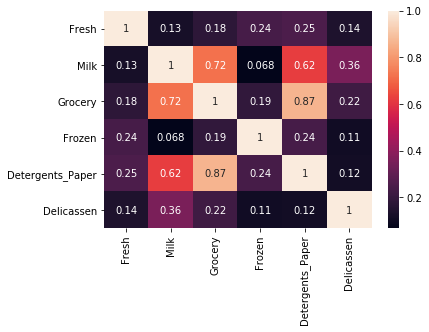

In [52]:
corr_matrix = customers_scale.iloc[:,:6].corr().abs()
corr_matrix
sns.heatmap(corr_matrix,annot=True)

#Inspecting the correlation matrix after the features scaling 
# looks liketGrocery may not be necessary for identifying customers' spending habits
# since is highly correlated with Milk and Detergents_Paper but Detergents_Paper and Milk is less correlated
# however I am going to keep groceries because the correlation is lower than 0.8 with the other two variables for now

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [54]:
# Your code here:

from sklearn.cluster import KMeans
kmeans = KMeans().fit(customers_scale)
customers_scale['labels']=kmeans.labels_

Count the values in `labels`.

In [55]:
# Your code here:

customers_scale['labels'].value_counts()


3    118
7     83
0     59
2     43
1     41
4     39
5     23
6      8
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [56]:
# Your code here

from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5).fit(customers_scale)
customers_scale['labels_DBSCAN']=clustering.labels_



Count the values in `labels_DBSCAN`.

In [57]:
# Your code here

customers_scale['labels_DBSCAN'].value_counts()


-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [33]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [34]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [35]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [36]:
# Your code here:


Which algorithm appears to perform better?

In [37]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [38]:
# Your code here

In [39]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [40]:
# Your code here

In [41]:
# Your comment here